In [23]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler

In [24]:
df = pd.read_excel('../datasets/house.xlsx')
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [25]:
df = df.drop(labels='No', axis=1)
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [26]:
cols = df.columns[df.columns != "Y house price of unit area"]
cols

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'],
      dtype='object')

In [29]:
feature = df[cols]
target = df['Y house price of unit area']
target

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

In [31]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=2023)
models = LinearRegression()
models.fit(x_train, y_train)

LinearRegression()

In [33]:
y_pred = models.predict(x_test)
MSE(y_test, y_pred), R2(y_test, y_pred)

(134.0804315060805, 0.4230498046950649)

In [35]:
y_test.min(), y_test.max()

(16.7, 117.5)

In [36]:
train_y_pred = models.predict(x_train)
MSE(y_train, train_y_pred), R2(y_train, train_y_pred)

(63.04524615529926, 0.6349019929508488)

In [37]:
feature.var(axis=0)

X1 transaction date                       7.952136e-02
X2 house age                              1.297887e+02
X3 distance to the nearest MRT station    1.592921e+06
X4 number of convenience stores           8.676334e+00
X5 latitude                               1.540130e-04
X6 longitude                              2.355360e-04
dtype: float64

In [40]:
feature = feature.drop(labels=["X5 latitude", "X6 longitude"], axis=1)
feature

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
0,2012.916667,32.0,84.87882,10
1,2012.916667,19.5,306.59470,9
2,2013.583333,13.3,561.98450,5
3,2013.500000,13.3,561.98450,5
4,2012.833333,5.0,390.56840,5
...,...,...,...,...
409,2013.000000,13.7,4082.01500,0
410,2012.666667,5.6,90.45606,9
411,2013.250000,18.8,390.96960,7
412,2013.000000,8.1,104.81010,5


In [41]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=2023)
models = LinearRegression()
models.fit(x_train, y_train)

LinearRegression()

In [42]:
y_pred = models.predict(x_test)
MSE(y_test, y_pred), R2(y_test, y_pred)

(138.29740521172536, 0.40490410083851636)

In [43]:
train_y_pred = models.predict(x_train)
MSE(y_train, train_y_pred), R2(y_train, train_y_pred)

(68.17323104410323, 0.6052055895381527)

In [52]:
from sklearn.preprocessing import PolynomialFeatures
p2 = PolynomialFeatures(degree=2)
feature_2 = p2.fit_transform(feature)
x_train, x_test, y_train, y_test = train_test_split(feature_2, target, test_size=0.2, random_state=2023)
feature_2

array([[1.00000000e+00, 2.01291667e+03, 3.20000000e+01, ...,
        7.20441408e+03, 8.48788200e+02, 1.00000000e+02],
       [1.00000000e+00, 2.01291667e+03, 1.95000000e+01, ...,
        9.40003101e+04, 2.75935230e+03, 8.10000000e+01],
       [1.00000000e+00, 2.01358333e+03, 1.33000000e+01, ...,
        3.15826578e+05, 2.80992250e+03, 2.50000000e+01],
       ...,
       [1.00000000e+00, 2.01325000e+03, 1.88000000e+01, ...,
        1.52857228e+05, 2.73678720e+03, 4.90000000e+01],
       [1.00000000e+00, 2.01300000e+03, 8.10000000e+00, ...,
        1.09851571e+04, 5.24050500e+02, 2.50000000e+01],
       [1.00000000e+00, 2.01350000e+03, 6.50000000e+00, ...,
        8.18229879e+03, 8.14104540e+02, 8.10000000e+01]])

In [53]:
feature

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
0,2012.916667,32.0,84.87882,10
1,2012.916667,19.5,306.59470,9
2,2013.583333,13.3,561.98450,5
3,2013.500000,13.3,561.98450,5
4,2012.833333,5.0,390.56840,5
...,...,...,...,...
409,2013.000000,13.7,4082.01500,0
410,2012.666667,5.6,90.45606,9
411,2013.250000,18.8,390.96960,7
412,2013.000000,8.1,104.81010,5


In [54]:
model_2 = LinearRegression()
model_2.fit(x_train, y_train)
y_pred_train = model_2.predict(x_train)
print(MSE(y_train, y_pred_train), R2(y_train, y_pred_train))
y_pred_test = model_2.predict(x_test)
print(MSE(y_test, y_pred_test), R2(y_test, y_pred_test))

52.950533845677235 0.6933609501400857
122.20853855373082 0.4741347458796912


In [55]:
p3 = PolynomialFeatures(degree=4)
feature_3 = p3.fit_transform(feature)
x_train, x_test, y_train, y_test = train_test_split(feature_3, target, test_size=0.2, random_state=2023)
model_3 = LinearRegression()
model_3.fit(x_train, y_train)
y_pred_train = model_3.predict(x_train)
print(MSE(y_train, y_pred_train), R2(y_train, y_pred_train))
y_pred_test = model_3.predict(x_test)
print(MSE(y_test, y_pred_test), R2(y_test, y_pred_test))

43.60277691909542 0.747494253321551
137.8211864455723 0.40695327764272005


# 欠拟合

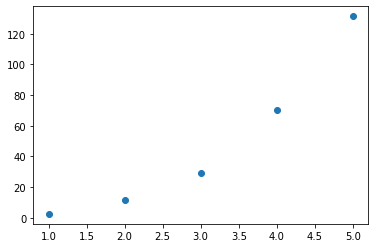

In [57]:
import matplotlib.pyplot as plt
import numpy as np
x = np.array([1, 2 ,3, 4, 5])
y = x + 1 + x ** 3 + np.random.normal(0, 1, size=5)
plt.scatter(x, y)

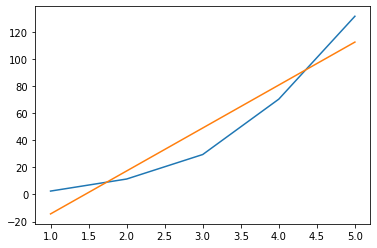

In [64]:
lm1 = LinearRegression()
lm1.fit(x.reshape(-1, 1), y.reshape(-1, 1))
y_ = lm1.predict(x.reshape(-1, 1))
plt.plot(x, y)
plt.plot(x.reshape(-1, 1), y_)

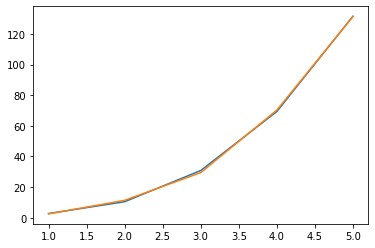

In [68]:
p = PolynomialFeatures(degree=3)
p3_x_train = p.fit_transform(x.reshape(-1, 1))
model_p = LinearRegression()
model_p.fit(p3_x_train, y.reshape(-1, 1))
y_ = model_p.predict(p3_x_train)
plt.plot(x.reshape(-1, 1), y_)
plt.plot(x.reshape(-1, 1), y.reshape(-1, 1))